In [1]:
import process as pc
from IPython.core.interactiveshell import InteractiveShell

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import joblib
import cv2

import numpy as np

InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False

In [2]:
def print_image(image, keypoints):
    _, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image)
    for kp in keypoints:
        rect = patches.Rectangle((kp[0]-40, kp[1]-40), kp[0]+40, kp[1]+40, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show();

In [3]:
pipeline_save_path = pc.DATA_PATH+"/hog_features_train_test.pkl"
image_path = pc.DATA_PATH+"/final/allegri.jpeg"
#image_path =pc.DATA_PATH+"/img_align_celeba/073425.jpg"

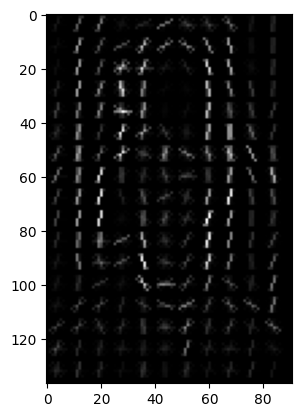

In [4]:
from skimage.feature import hog
image = cv2.imread(image_path)
image = pc.process_image(image, resize=True, img_resize=(image.shape[0]//2, image.shape[1]//2))
features, hog_img = hog(image, visualize=True)
plt.imshow(hog_img, cmap='gray');

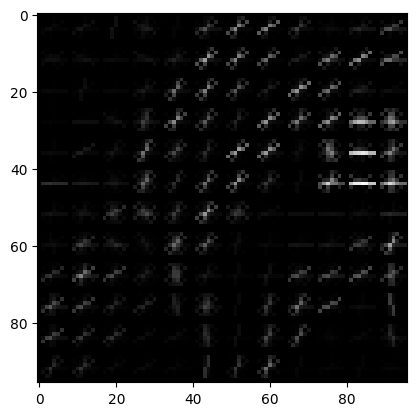

(8100,)


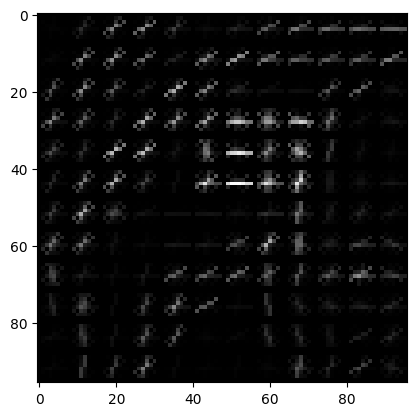

(8100,)


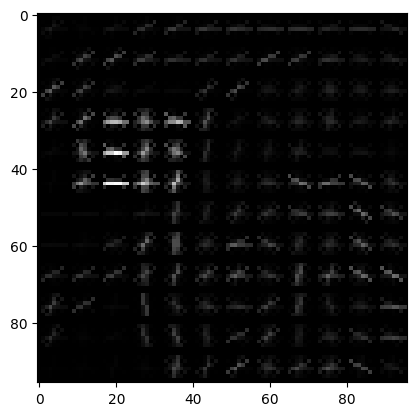

(8100,)


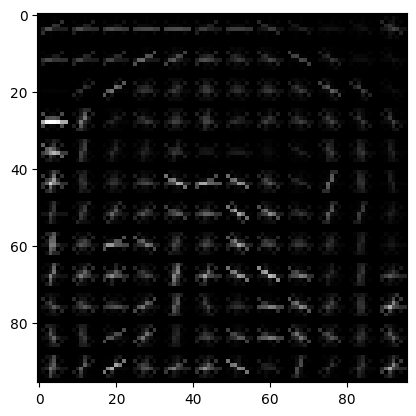

(8100,)


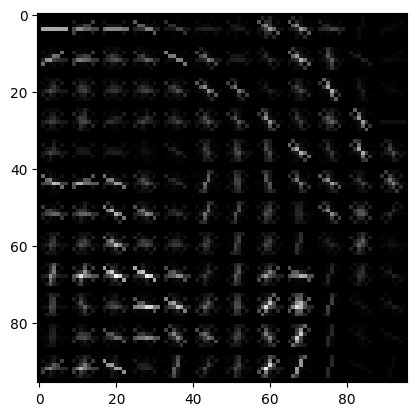

(8100,)


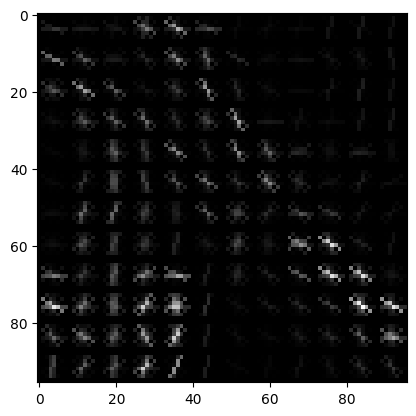

(8100,)


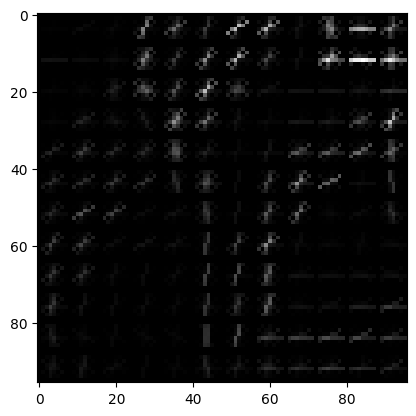

(8100,)


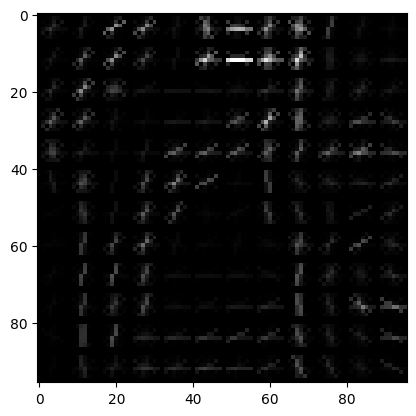

(8100,)


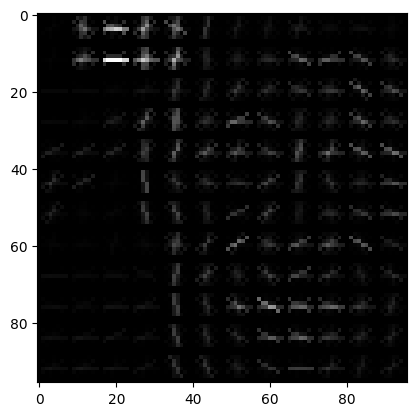

(8100,)


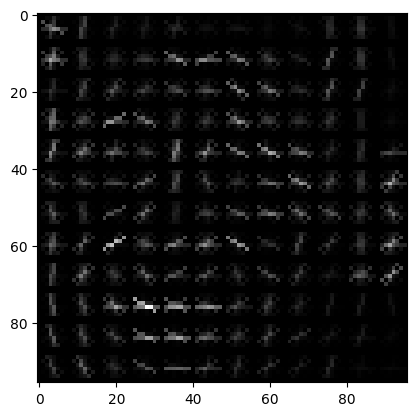

(8100,)


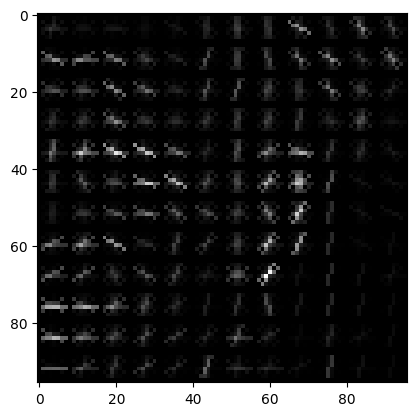

(8100,)


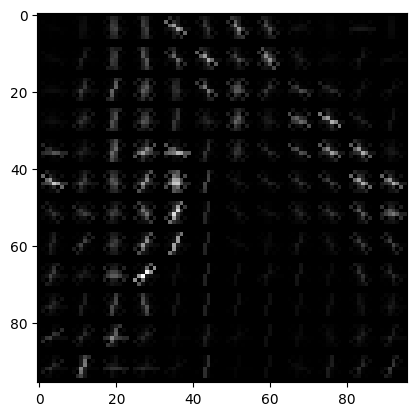

(8100,)


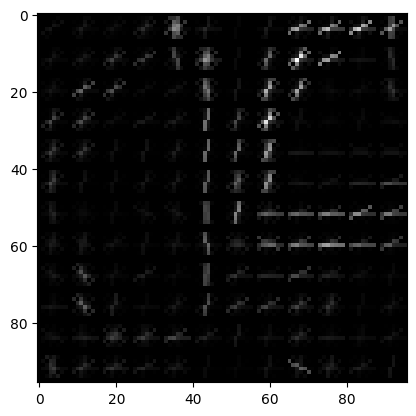

(8100,)


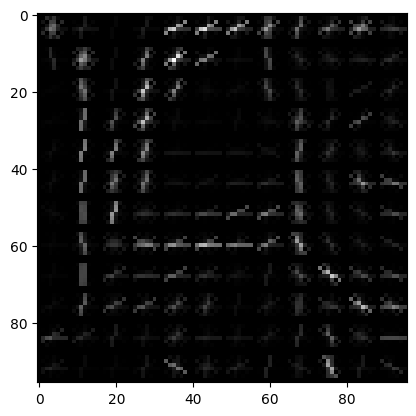

(8100,)


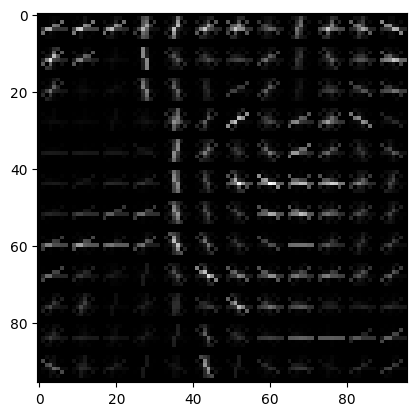

(8100,)


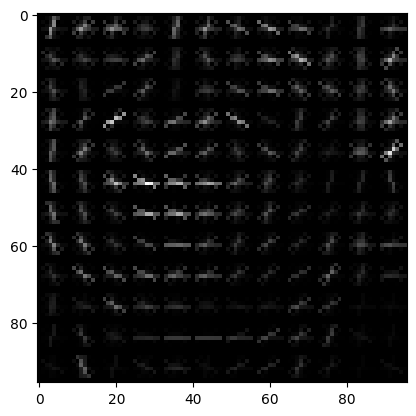

(8100,)


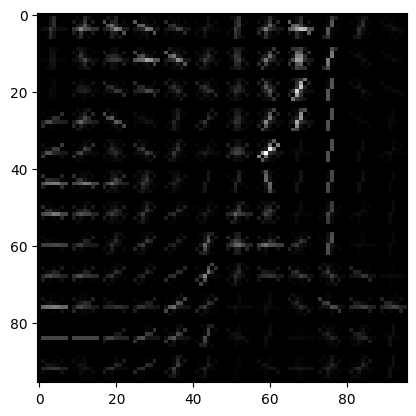

(8100,)


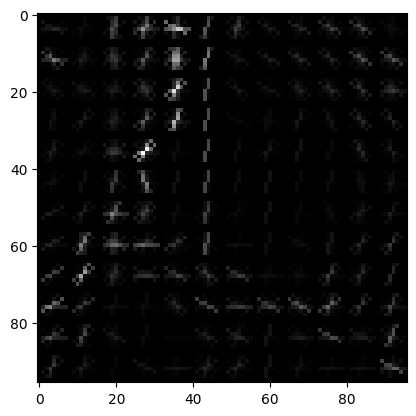

(8100,)
(18, 8100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.19162644 0.30802417 0.2705081  0.41240239 0.0916657  0.10074175
 0.09030106 0.15721424 0.19298278 0.22180211 0.10473822 0.14711337
 0.09136157 0.20119018 0.11876668 0.21326566 0.09342889 0.13818456]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
image = cv2.imread(image_path)
pipeline = joblib.load(pipeline_save_path)
keypoints, _ = pc.detect_faces(image, pipeline, method='HOG', threshold=0.6, window_size=(96, 96), step_size=(32,32),\
                                n_keypoints=8100, resize=False, image_size=(512, 512), verbose=True, notebook=True)
keypoints

In [ ]:
print_image(image, keypoints)

In [ ]:
pipeline_save_path = pc.DATA_PATH+"/svm_model_3.pkl"
image_path = pc.DATA_PATH+"/final/Valentino_Rossi_2017.jpg"
pipeline = joblib.load(pipeline_save_path)
image = mpimg.imread(image_path)
keypoints, _ = pc.detect_faces(image, pipeline, method='ORB', threshold=0.65, window_size=(128, 128), step_size=(64, 64), n_keypoints=32, resize=False, verbose=True, notebook=True)
keypoints

In [ ]:
print_image(image, keypoints)
